In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
#converting it into dataframe and just using petal width and petal length

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


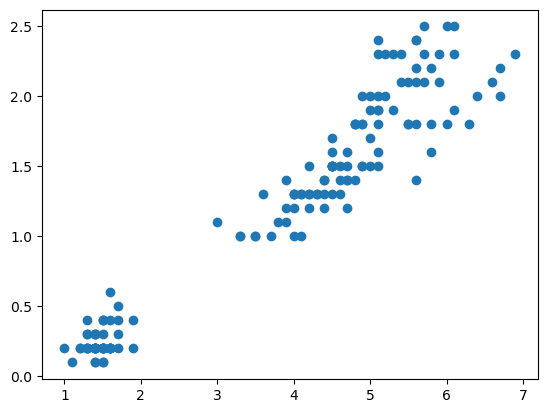

In [18]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

# starting with a k value of 3

In [22]:
km = KMeans(n_clusters = 3) #initizliaing the model with 3 clusters
km

KMeans(n_clusters=3)

In [25]:
#Making predictions

y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_pred

/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
#Adding this clustered info into the dataset

df['cluster'] = y_pred

In [27]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


Text(0.5, 1.0, 'Petal length vs width')

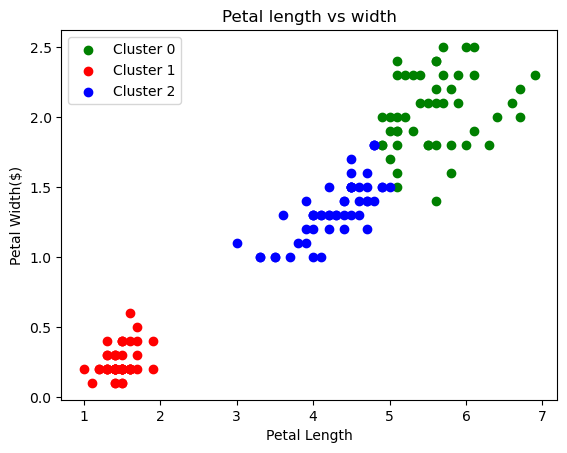

In [28]:
#Seperating these 3 clusters into 3 dataframes

df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 0') 
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue', label='Cluster 2')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width($)')
plt.legend()
plt.title('Petal length vs width')


# we can see 3 distinct clusters

In [29]:
# Checking out the elbow plot to confirm our choice for k

In [30]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
    
    sse.append(km.inertia_) #inertia parameter gives us sum of square error

/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vikramjeet/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/cluster/

In [31]:
sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 19.465989010989013,
 13.98321314102564,
 11.025145110250373,
 9.212104827285605,
 7.624193062579723,
 6.456494541406307]

Text(0, 0.5, 'Sum of squared error')

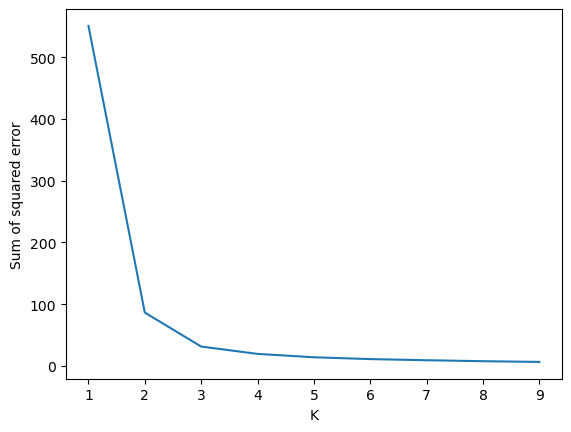

In [33]:
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

# Elbow seems to form at k = 3